✅ Dataset Loaded Successfully!

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


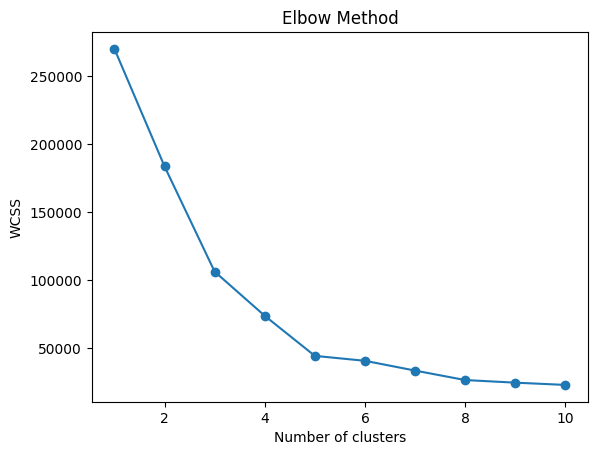

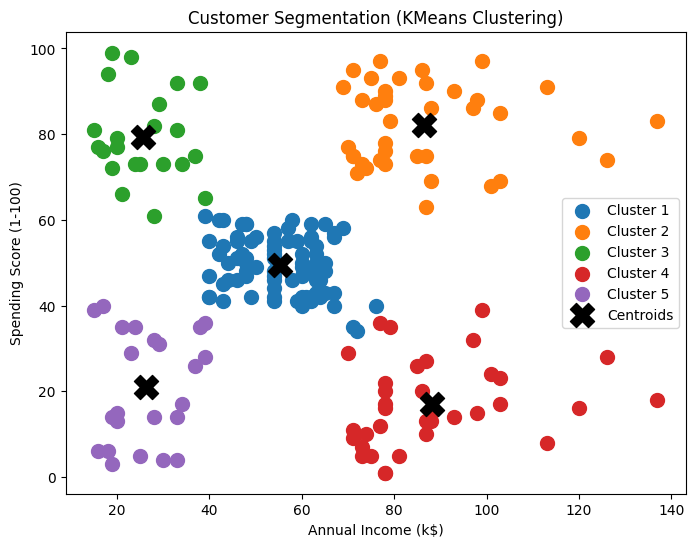


📌 Sample of clustered data:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

📊 Cluster Analysis (mean values):
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286        

In [ ]:
# -----------------------------
# Customer Segmentation Project
# -----------------------------

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2: Load Dataset (make sure the file is in ./data/)
data = pd.read_csv("/content/Mall_Customers.csv")
print("✅ Dataset Loaded Successfully!\n")
print(data.head())

# Step 3: Select features for clustering
X = data.iloc[:, [3, 4]].values  # Annual Income & Spending Score

# Step 4: Find optimal number of clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Step 5: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 6: Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, label="Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, label="Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, label="Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, label="Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, label="Cluster 5")

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='X', label="Centroids")

plt.title("Customer Segmentation (KMeans Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Step 7: Add cluster labels to dataset
data["Cluster"] = y_kmeans
print("\n📌 Sample of clustered data:")
print(data.head())

# Step 8: Cluster insights
print("\n📊 Cluster Analysis (mean values):")
print(data.groupby("Cluster").mean(numeric_only=True))

